In [1]:
!pip install pandas
import pandas as pd

defillama_stablecoins_path = './data/defillama_stablecoins.csv'
rwa_stablecoin_xyz_path = './data/rwa_stablecoin_xyz.csv'

defillama_df = pd.read_csv(defillama_stablecoins_path)
rwa_df = pd.read_csv(rwa_stablecoin_xyz_path)



Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


In [29]:
defillama_df.head()



,Timestamp,Date,USDT,USDC,USTC,BUSD,DAI,FRAX,TUSD,LUSD,...,EURD,XUSD,ULTRA,USDCB,cgUSD,fETH,fxUSD,GAI,EURO3,Total
0,1617148800,2021-03-31,4.072640e+10,1.091108e+10,1.606224e+09,3.583389e+09,3.015418e+09,1.112374e+08,3.295572e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.270884e+10
1,1617235200,2021-04-01,4.082866e+10,1.081464e+10,1.620057e+09,3.481946e+09,3.009058e+09,1.125756e+08,3.278335e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.265331e+10
2,1617321600,2021-04-02,4.086523e+10,1.087159e+10,1.647230e+09,3.527311e+09,2.965694e+09,1.122272e+08,3.217319e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.275346e+10
3,1617408000,2021-04-03,4.181313e+10,1.090838e+10,1.663062e+09,3.826085e+09,3.041816e+09,1.170263e+08,3.288199e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.632674e+10
4,1617494400,2021-04-04,4.247584e+10,1.076522e+10,1.673207e+09,3.955678e+09,3.059450e+09,1.129356e+08,3.152856e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.700625e+10


In [2]:
rwa_df = (
    rwa_df.assign(
        market_cap=rwa_df['market_cap'].replace('[\$,]', '', regex=True).astype(float),
        tbills_amount_est=rwa_df['tbills_amount_est'].replace('[\$,]', '', regex=True).astype(float)
    )
    .assign(tbill_pct=lambda x: x['tbills_amount_est'] / x['market_cap'])
    .pipe(
        lambda x: x[(
            list(x.columns[:x.columns.get_loc('price')]) +
            ['tbill_pct'] +
            list(x.columns[x.columns.get_loc('price'):-1])
        )]
    )
)

rwa_df.head()

,name,ticker,networks,market_cap,tbills_amount_est,tbill_pct,price,pegged_currency,underlying_assets,underlying_assets_tbills,incorporation_country,regulatory,rating_by_bluechip,weekly_active_addresses,weekly_transfer_volume,contract_addresses
0,Tether USD,USDT,NaN,1.043586e+11,6.785047e+10,0.650166,0.9995,US Dollar,Money Market - Fund+ 6 More,us_treasury_debt,Hong Kong,FinCEN - Financial Crimes Enforcement Network,D,"3,270,262","144,117,337,923",4 Addresses
1,Circle USD Coin,USDC,NaN,2.673938e+10,7.391264e+09,0.276419,0.9993,US Dollar,Money Market - Fund+ 3 More,us_treasury_debt,United States of America,FinCEN - Financial Crimes Enforcement Network,B+,"564,482","164,698,867,553",8 Addresses
2,MakerDAO Dai,DAI,NaN,3.193386e+09,1.680000e+09,0.526087,0.9993,US Dollar,Structured Credit+ 4 More,us_treasury_debt,NaN,NaN,B+,"9,752","17,641,832,182",0x6b1...271d0f
3,First Digital Labs USD,FDUSD,NaN,2.921742e+09,4.053000e+08,0.138719,0.9987,US Dollar,Money Market - RRP+ 2 More,us_treasury_debt,Hong Kong,NaN,C,122,"4,661,416,130",0xc5f...e16409
4,Techteryx TrueUSD,TUSD,NaN,1.181063e+09,NaN,NaN,1.0000,US Dollar,Money Market - Fund+ 2 More,us_treasury_debt,British Virgin Islands,NaN,D,546,"22,993,645",2 Addresses


In [17]:
!pip install matplotlib
import matplotlib.pyplot as plt



Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


In [16]:
rwa_df.columns

rwa_df_select = rwa_df[['name', 'ticker', 'market_cap', 'tbills_amount_est', 'tbill_pct', 'underlying_assets_tbills']]

filtered_rwa_df = rwa_df_select[rwa_df_select['tbills_amount_est'].notna()]

filtered_rwa_df

,name,ticker,market_cap,tbills_amount_est,tbill_pct,underlying_assets_tbills
0,Tether USD,USDT,1.043586e+08,6.785047e+07,0.650166,us_treasury_debt
1,Circle USD Coin,USDC,2.673938e+07,7.391264e+06,0.276419,us_treasury_debt
2,MakerDAO Dai,DAI,3.193386e+06,1.680000e+06,0.526087,us_treasury_debt
3,First Digital Labs USD,FDUSD,2.921742e+06,4.053000e+05,0.138719,us_treasury_debt
6,Frax Finance,FRAX,6.458193e+05,1.940686e+03,0.003005,us_treasury_debt
8,Tether Euro,EURT,4.353429e+05,2.830454e+05,0.650166,us_treasury_debt
9,Paypal USD (Paxos),PYUSD,3.011752e+05,4.980250e+03,0.016536,us_treasury_debt
10,Pax Dollar (Paxos),USDP,3.531010e+05,1.245250e+05,0.352661,us_treasury_debt
11,Mountain Protocol USD,USDM,1.494202e+05,1.519673e+05,1.017047,us_treasury_debt
12,Gemini Dollar,GUSD,1.461214e+05,1.021335e+04,0.069896,us_treasury_debt


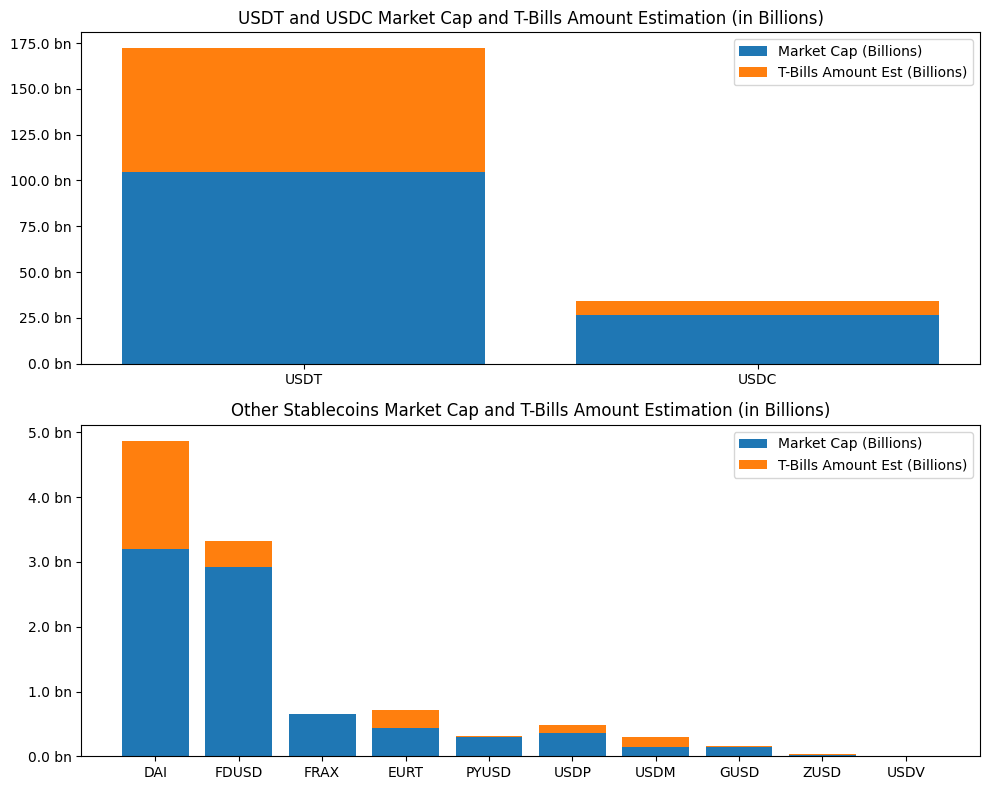

In [20]:
# Convert market_cap and tbills_amount_est to billions for plotting
rwa_df['market_cap'] = rwa_df['market_cap'] /1000  # Convert to billions
rwa_df['tbills_amount_est'] = rwa_df['tbills_amount_est'] /1000   # Convert to billions

# Filter the DataFrame to include only rows where 'tbills_amount_est' is not NaN
filtered_df = rwa_df[rwa_df['tbills_amount_est'].notna()]

# Separate the data for USDT and USDC, and other stablecoins
usdt_usdc_df = filtered_df[filtered_df['ticker'].isin(['USDT', 'USDC'])]
other_df = filtered_df[~filtered_df['ticker'].isin(['USDT', 'USDC'])]

# Creating two bar charts: one for USDT and USDC, and one for other stablecoins
# Function to format the tick labels for billions
def billions_formatter(x, pos):
    """Converts tick labels to represent billions with 'bn'"""
    return f'{x} bn'

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# USDT and USDC bar chart
axes[0].bar(usdt_usdc_df['ticker'], usdt_usdc_df['market_cap'], label='Market Cap (Billions)')
axes[0].bar(usdt_usdc_df['ticker'], usdt_usdc_df['tbills_amount_est'], bottom=usdt_usdc_df['market_cap'], label='T-Bills Amount Est (Billions)')
axes[0].set_title('USDT and USDC Market Cap and T-Bills Amount Estimation (in Billions)')
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(billions_formatter))
axes[0].legend()

# Other stablecoins bar chart
axes[1].bar(other_df['ticker'], other_df['market_cap'], label='Market Cap (Billions)')
axes[1].bar(other_df['ticker'], other_df['tbills_amount_est'], bottom=other_df['market_cap'], label='T-Bills Amount Est (Billions)')
axes[1].set_title('Other Stablecoins Market Cap and T-Bills Amount Estimation (in Billions)')
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(billions_formatter))
axes[1].legend()

plt.tight_layout()
plt.show()


In [21]:
# divided market_cap and tbills_amount_est by 1000 to get y-axis above to "bn"
rwa_df.head()

,name,ticker,networks,market_cap,tbills_amount_est,tbill_pct,price,pegged_currency,underlying_assets,underlying_assets_tbills,incorporation_country,regulatory,rating_by_bluechip,weekly_active_addresses,weekly_transfer_volume,contract_addresses
0,Tether USD,USDT,NaN,104.358614,67.850471,0.650166,0.9995,US Dollar,Money Market - Fund+ 6 More,us_treasury_debt,Hong Kong,FinCEN - Financial Crimes Enforcement Network,D,"3,270,262","144,117,337,923",4 Addresses
1,Circle USD Coin,USDC,NaN,26.739380,7.391264,0.276419,0.9993,US Dollar,Money Market - Fund+ 3 More,us_treasury_debt,United States of America,FinCEN - Financial Crimes Enforcement Network,B+,"564,482","164,698,867,553",8 Addresses
2,MakerDAO Dai,DAI,NaN,3.193386,1.680000,0.526087,0.9993,US Dollar,Structured Credit+ 4 More,us_treasury_debt,NaN,NaN,B+,"9,752","17,641,832,182",0x6b1...271d0f
3,First Digital Labs USD,FDUSD,NaN,2.921742,0.405300,0.138719,0.9987,US Dollar,Money Market - RRP+ 2 More,us_treasury_debt,Hong Kong,NaN,C,122,"4,661,416,130",0xc5f...e16409
4,Techteryx TrueUSD,TUSD,NaN,1.181063,NaN,NaN,1.0000,US Dollar,Money Market - Fund+ 2 More,us_treasury_debt,British Virgin Islands,NaN,D,546,"22,993,645",2 Addresses


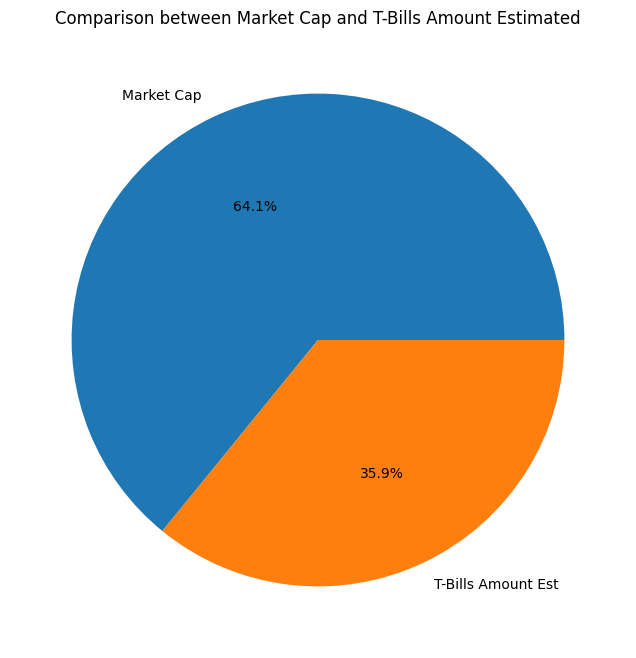

In [22]:
import matplotlib.pyplot as plt
import pandas as pd


market_cap_sum = filtered_rwa_df['market_cap'].sum()
tbills_amount_est_sum = filtered_rwa_df['tbills_amount_est'].sum()

# Data for pie chart
data = [market_cap_sum, tbills_amount_est_sum]
labels = ['Market Cap', 'T-Bills Amount Est']

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title('Comparison between Market Cap and T-Bills Amount Estimated')
plt.show()

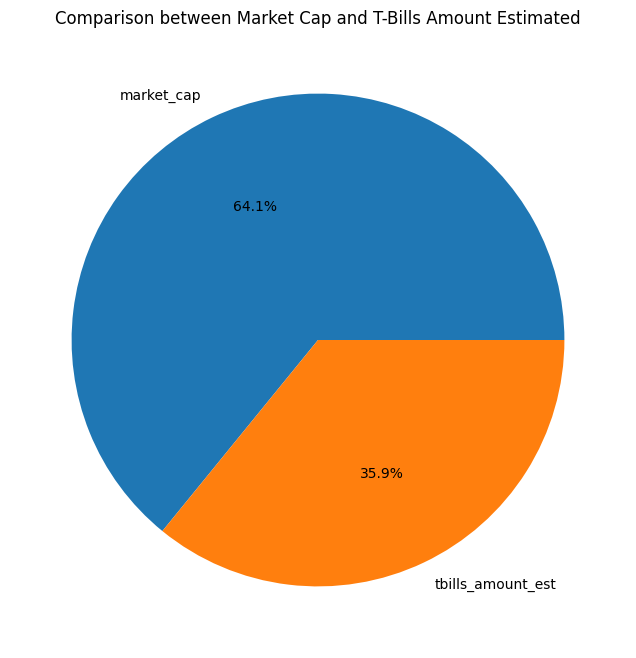

In [23]:
import matplotlib.pyplot as plt

# Chaining the operations
sums = (rwa_df[['name', 'ticker', 'market_cap', 'tbills_amount_est', 'tbill_pct', 'underlying_assets_tbills']]
        .dropna(subset=['tbills_amount_est'])
        .agg({'market_cap': 'sum', 'tbills_amount_est': 'sum'}))

# Data for pie chart
data = sums.values
labels = sums.index

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title('Comparison between Market Cap and T-Bills Amount Estimated')
plt.show()

In [37]:
filtered_rwa_df

,name,ticker,market_cap,tbills_amount_est,tbill_pct,underlying_assets_tbills
0,Tether USD,USDT,1.043586e+08,6.785047e+07,0.650166,us_treasury_debt
1,Circle USD Coin,USDC,2.673938e+07,7.391264e+06,0.276419,us_treasury_debt
2,MakerDAO Dai,DAI,3.193386e+06,1.680000e+06,0.526087,us_treasury_debt
3,First Digital Labs USD,FDUSD,2.921742e+06,4.053000e+05,0.138719,us_treasury_debt
6,Frax Finance,FRAX,6.458193e+05,1.940686e+03,0.003005,us_treasury_debt
8,Tether Euro,EURT,4.353429e+05,2.830454e+05,0.650166,us_treasury_debt
9,Paypal USD (Paxos),PYUSD,3.011752e+05,4.980250e+03,0.016536,us_treasury_debt
10,Pax Dollar (Paxos),USDP,3.531010e+05,1.245250e+05,0.352661,us_treasury_debt
11,Mountain Protocol USD,USDM,1.494202e+05,1.519673e+05,1.017047,us_treasury_debt
12,Gemini Dollar,GUSD,1.461214e+05,1.021335e+04,0.069896,us_treasury_debt


In [33]:
# filtered_rwa_df['ticker']

# defillama_df.columns

# Extract the list of ticker symbols from filtered_rwa_df
tickers = filtered_rwa_df['ticker'].unique()

# Convert the array of tickers into a pandas Series
tickers_series = pd.Series(tickers)

# Filter the tickers that are present as column names in defillama_df
filtered_tickers = tickers_series[tickers_series.isin(defillama_df.columns)]

# Add 'Timestamp' and 'Date' to the list of columns to retain
columns_to_retain = filtered_tickers.tolist() + ['Timestamp', 'Date']

# Subset defillama_df using the columns to retain
subset_defillama_df = defillama_df.loc[:, columns_to_retain]

# Move 'Timestamp' and 'Date' to the beginning of the DataFrame
final_columns_order = ['Timestamp', 'Date'] + [col for col in subset_defillama_df.columns if col not in ['Timestamp', 'Date']]
subset_defillama_df = subset_defillama_df[final_columns_order]

subset_defillama_df

,Timestamp,Date,USDT,USDC,DAI,FDUSD,FRAX,EURT,PYUSD,USDP,USDM,GUSD,ZUSD,USDV
0,1617148800,2021-03-31,4.072640e+10,1.091108e+10,3.015418e+09,NaN,1.112374e+08,NaN,NaN,9.553460e+08,NaN,1.238934e+08,604104.24,NaN
1,1617235200,2021-04-01,4.082866e+10,1.081464e+10,3.009058e+09,NaN,1.125756e+08,NaN,NaN,9.820290e+08,NaN,1.255851e+08,603931.29,NaN
2,1617321600,2021-04-02,4.086523e+10,1.087159e+10,2.965694e+09,NaN,1.122272e+08,NaN,NaN,9.721631e+08,NaN,1.235295e+08,605776.95,NaN
3,1617408000,2021-04-03,4.181313e+10,1.090838e+10,3.041816e+09,NaN,1.170263e+08,NaN,NaN,9.802246e+08,NaN,1.231078e+08,607096.14,NaN
4,1617494400,2021-04-04,4.247584e+10,1.076522e+10,3.059450e+09,NaN,1.129356e+08,NaN,NaN,9.822631e+08,NaN,1.229125e+08,605427.76,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,1709942400,2024-03-09,1.017896e+11,2.843871e+10,4.341966e+09,2.918264e+09,6.452420e+08,49470515.97,1.914719e+08,2.026005e+08,1.530383e+08,1.481287e+08,18923586.56,24804030.53
1075,1710028800,2024-03-10,1.020164e+11,2.847396e+10,4.340023e+09,2.935756e+09,6.463552e+08,49515901.77,1.910957e+08,2.027759e+08,1.530586e+08,1.484447e+08,18923585.56,24729164.57
1076,1710115200,2024-03-11,1.020123e+11,2.854978e+10,4.509826e+09,2.918264e+09,6.461649e+08,49515901.77,1.929016e+08,2.027252e+08,1.518311e+08,1.482945e+08,18923586.56,24745406.33
1077,1710201600,2024-03-12,1.023671e+11,2.893349e+10,4.504067e+09,2.862440e+09,6.465994e+08,49515901.77,1.906501e+08,2.027968e+08,1.526418e+08,1.481038e+08,18923567.56,24883664.96


In [41]:
# First, get the list of ticker columns that exist in defillama_df
# valid_tickers = filtered_rwa_df['ticker'].unique()
# valid_tickers = [ticker for ticker in valid_tickers if ticker in defillama_df.columns]

# Now, create the subset with the valid tickers and 'Timestamp' and 'Date' columns
# subset_defillama_df = defillama_df.loc[:, ['Timestamp', 'Date'] + valid_tickers]

subset_defillama_df = (
    defillama_df
    .loc[:, ['Timestamp', 'Date'] + 
         [ticker for ticker in filtered_rwa_df['ticker'].unique() if ticker in defillama_df.columns]]
)

subset_defillama_df

,Timestamp,Date,USDT,USDC,DAI,FDUSD,FRAX,EURT,PYUSD,USDP,USDM,GUSD,ZUSD,USDV
0,1617148800,2021-03-31,4.072640e+10,1.091108e+10,3.015418e+09,NaN,1.112374e+08,NaN,NaN,9.553460e+08,NaN,1.238934e+08,604104.24,NaN
1,1617235200,2021-04-01,4.082866e+10,1.081464e+10,3.009058e+09,NaN,1.125756e+08,NaN,NaN,9.820290e+08,NaN,1.255851e+08,603931.29,NaN
2,1617321600,2021-04-02,4.086523e+10,1.087159e+10,2.965694e+09,NaN,1.122272e+08,NaN,NaN,9.721631e+08,NaN,1.235295e+08,605776.95,NaN
3,1617408000,2021-04-03,4.181313e+10,1.090838e+10,3.041816e+09,NaN,1.170263e+08,NaN,NaN,9.802246e+08,NaN,1.231078e+08,607096.14,NaN
4,1617494400,2021-04-04,4.247584e+10,1.076522e+10,3.059450e+09,NaN,1.129356e+08,NaN,NaN,9.822631e+08,NaN,1.229125e+08,605427.76,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,1709942400,2024-03-09,1.017896e+11,2.843871e+10,4.341966e+09,2.918264e+09,6.452420e+08,49470515.97,1.914719e+08,2.026005e+08,1.530383e+08,1.481287e+08,18923586.56,24804030.53
1075,1710028800,2024-03-10,1.020164e+11,2.847396e+10,4.340023e+09,2.935756e+09,6.463552e+08,49515901.77,1.910957e+08,2.027759e+08,1.530586e+08,1.484447e+08,18923585.56,24729164.57
1076,1710115200,2024-03-11,1.020123e+11,2.854978e+10,4.509826e+09,2.918264e+09,6.461649e+08,49515901.77,1.929016e+08,2.027252e+08,1.518311e+08,1.482945e+08,18923586.56,24745406.33
1077,1710201600,2024-03-12,1.023671e+11,2.893349e+10,4.504067e+09,2.862440e+09,6.465994e+08,49515901.77,1.906501e+08,2.027968e+08,1.526418e+08,1.481038e+08,18923567.56,24883664.96


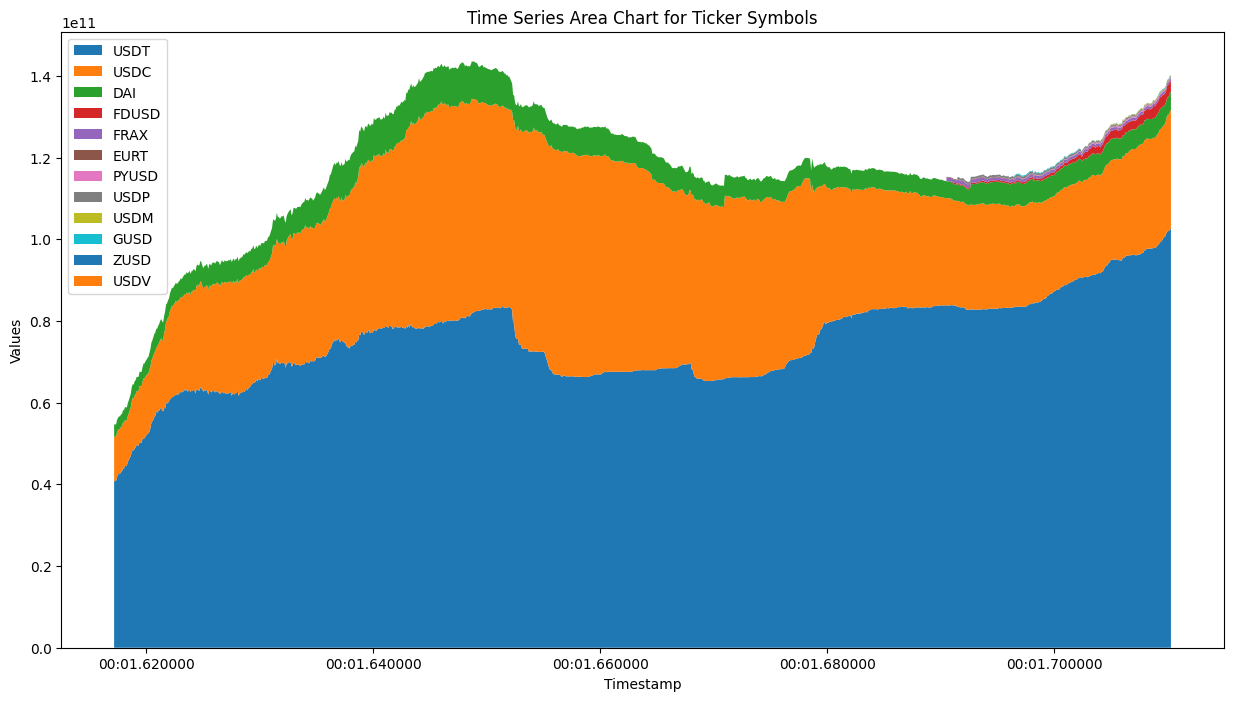

In [42]:
import matplotlib.pyplot as plt

# Ensure 'Timestamp' is a datetime type for proper plotting
subset_defillama_df['Timestamp'] = pd.to_datetime(subset_defillama_df['Timestamp'])

# Set 'Timestamp' as the index if it's not already
subset_defillama_df.set_index('Timestamp', inplace=True)

# Plotting
plt.figure(figsize=(15, 8))
# Here, subset_defillama_df.columns should only contain the ticker symbols
plt.stackplot(subset_defillama_df.index, 
              [subset_defillama_df[ticker] for ticker in subset_defillama_df.columns if ticker != 'Date'],
              labels=[ticker for ticker in subset_defillama_df.columns if ticker != 'Date'])
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Time Series Area Chart for Ticker Symbols')
plt.legend(loc='upper left')
plt.show()